In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [2]:
raw_cv_data = pd.read_csv("Data/Index2018.csv")
df_comp = raw_cv_data.copy()
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [3]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

### From Text to Date

In [4]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
df_comp.date.describe

<bound method NDFrame.describe of 0      1994-01-07
1      1994-01-10
2      1994-01-11
3      1994-01-12
4      1994-01-13
          ...    
6264   2018-01-23
6265   2018-01-24
6266   2018-01-25
6267   2018-01-26
6268   2018-01-29
Name: date, Length: 6269, dtype: datetime64[ns]>

### Setting the index

In [7]:
df_comp.set_index("date", inplace=True)

In [8]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [9]:
# df_comp.date.describe()

### Setting the Desired Frequency

In [10]:
df_comp = df_comp.asfreq('b')
# asfreq('b') only Business days
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling Missing Values 

In [11]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [12]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [13]:
df_comp.spx = df_comp.spx.fillna(method="ffill")

In [14]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:
df_comp.ftse = df_comp.ftse.fillna(method="bfill")

In [16]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [17]:
df_comp.dax = df_comp.dax.fillna(value= df_comp.dax.mean())

In [18]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

### Simplifying the DataSet

In [19]:
df_comp["market_value"] = df_comp.spx

In [20]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4043.122953,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10709.290000,992.715221
50%,1233.761241,5774.380000,5663.300000,15028.170000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [21]:
del df_comp['spx']

In [22]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6269.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4043.122953,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10709.290000,992.715221
50%,5774.380000,5663.300000,15028.170000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [23]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [24]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Splitting the data

In [25]:
size = int(len(df_comp)*0.8)

In [26]:
size

5021

In [27]:
df_train = df_comp.iloc[:size]

In [28]:
df_test = df_comp.iloc[size:]

In [29]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [30]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

In [31]:
wn = np.random.normal(loc = df_train.market_value.mean(), scale=df_train.market_value.std(), size=len(df_train))

In [32]:
df_train["wn"] = wn

C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_39536/2464485925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["wn"] = wn


In [33]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.289660
std,292.559287,292.357786
min,438.920000,-128.643429
25%,914.620000,893.507265
50%,1144.650000,1096.234206
75%,1316.280729,1289.841390
max,1570.252238,2105.819943


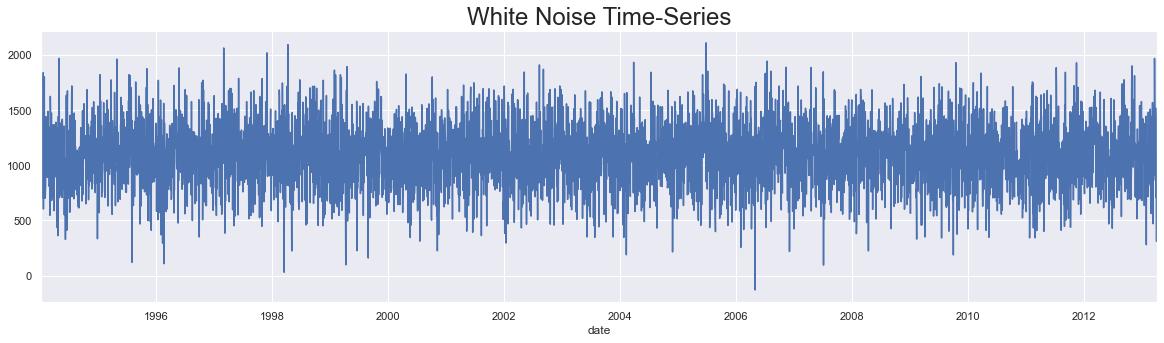

In [34]:
df_train.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size=24)
plt.show()

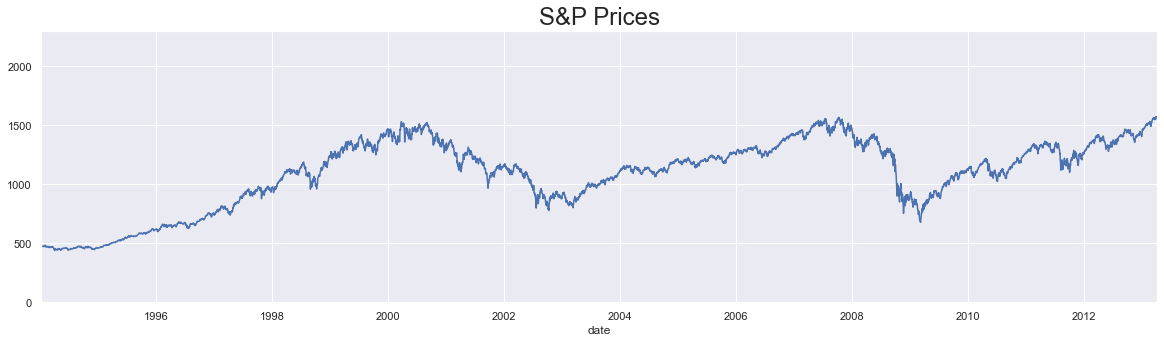

In [35]:
df_train.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [36]:
rw = pd.read_csv("Data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [37]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [38]:
df_train["rw"] = rw.price

C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_39536/1170015329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["rw"] = rw.price


In [39]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,744.017435,1122.139662
1994-01-10,475.27,1010.427846,1080.347860
1994-01-11,474.13,702.357996,1082.095245
1994-01-12,474.17,1319.309654,1083.639265
1994-01-13,472.47,1386.966304,1067.146255


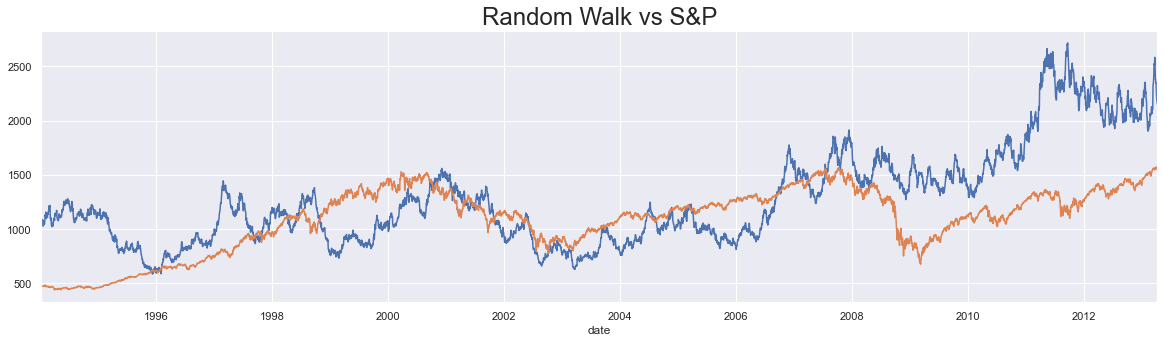

In [40]:
df_train.rw.plot(figsize = (20,5))
df_train.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [41]:
sts.adfuller(df_train.market_value)

(-1.7369847452352458,
 0.41216456967706105,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [42]:
sts.adfuller(df_train.wn)

(-71.65846920174319,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70796.6232574879)

In [43]:
sts.adfuller(df_train.rw)

(-1.3286073927689703,
 0.6159849181617391,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

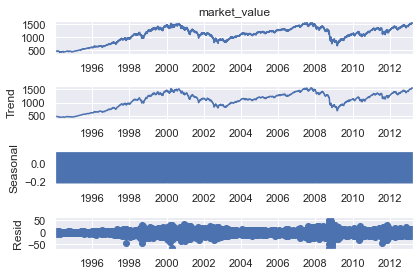

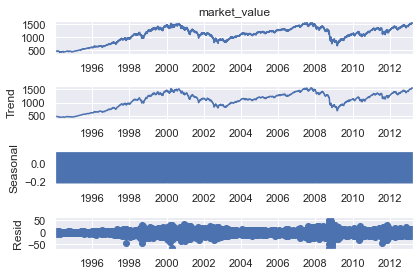

In [44]:
s_dec_additive = seasonal_decompose(df_train.market_value, model="additive")
s_dec_additive.plot()

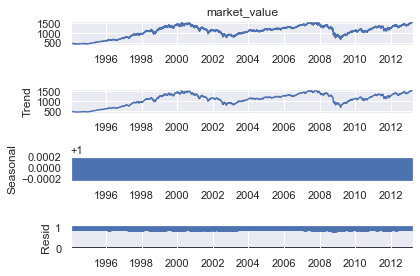

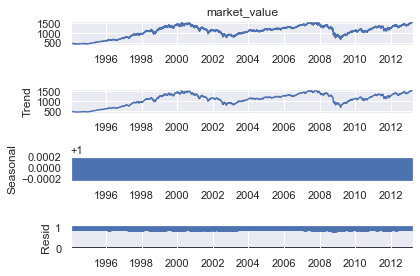

In [45]:
s_dec_additive = seasonal_decompose(df_train.market_value, model="multiplicative")
s_dec_additive.plot()

### The Autocorelation Function (ACF)

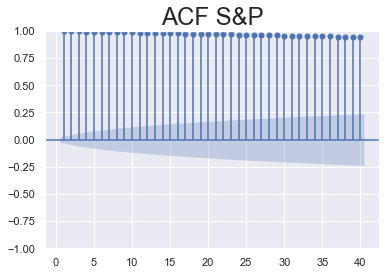

In [46]:
sgt.plot_acf(df_train.market_value, lags = 40, zero=False)
plt.title("ACF S&P", size = 24)
plt.show()

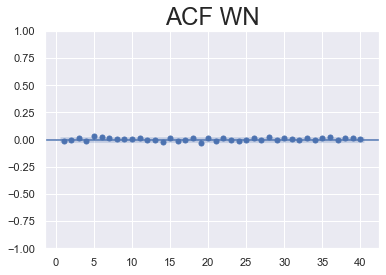

In [48]:
sgt.plot_acf(df_train.wn, lags = 40, zero=False)
plt.title("ACF WN", size = 24)
plt.show()

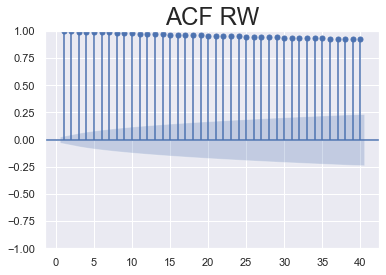

In [49]:
sgt.plot_acf(df_train.rw, lags = 40, zero=False)
plt.title("ACF RW", size = 24)
plt.show()

### The Partial Autocorrelation Functoin (PACF)

Text(0.5, 1.0, 'ACF S&P')

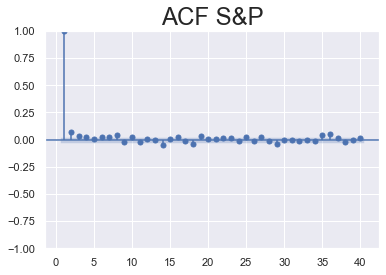

In [55]:
sgt.plot_pacf(df_train.market_value, lags = 40, zero=False, method="ols")
plt.title("ACF S&P", size = 24)

Text(0.5, 1.0, 'ACF WN')

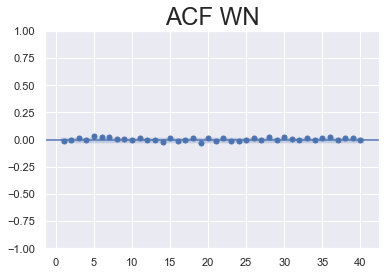

In [57]:
sgt.plot_pacf(df_train.wn, lags = 40, zero=False, method="ols")
plt.title("ACF WN", size = 24)

Text(0.5, 1.0, 'ACF RW')

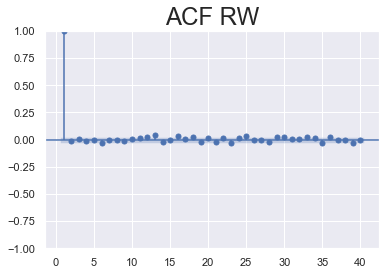

In [58]:
sgt.plot_pacf(df_train.rw, lags = 40, zero=False, method="ols")
plt.title("ACF RW", size = 24)